In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/csvs/medical_examination.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Add 'overweight' column

# bmi = weight / (0.01*height)^2
weight_vals = df['weight'].to_numpy().tolist()
height_vals = df['height'].to_numpy().tolist()

bmi_list = []
for x in range (len(weight_vals)):
  bmi = weight_vals[x] / ((0.01 * height_vals[x])**2)
  bmi_list.append(bmi)

overweight_list = []
for val in bmi_list:
  if val > 25:
    overweight_list.append(1)
  else:
    overweight_list.append(0)

df['overweight'] = overweight_list

In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

cholesterol_vals = df['cholesterol'].to_numpy().tolist()
gluc_vals = df['gluc'].to_numpy().tolist()

new_cholesterol = []
for val in cholesterol_vals:
  if val == 1:
    new_cholesterol.append(0)
  else:
    new_cholesterol.append(1)

new_gluc = []
for val in gluc_vals:
  if val == 1:
    new_gluc.append(0)
  else:
    new_gluc.append(1)

df['cholesterol'] = new_cholesterol
df['gluc'] = new_gluc

In [5]:
df_cardio_0 = df[df['cardio'] == 0]
df_cardio_0

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69987,99979,18852,1,151,49.0,120,80,0,0,0,0,1,0,0
69988,99981,21978,1,160,59.0,110,70,0,0,0,0,1,0,0
69991,99988,20609,1,159,72.0,130,90,1,1,0,0,1,0,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1


In [6]:
# Draw Categorical Plot
def draw_cat_plot():
    df_cardio_0 = df[df['cardio'] == 0]
    df_cardio_1 = df[df['cardio'] == 1]
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    grouped = df_cat.groupby('cardio')
    grouped_df = grouped.describe()

    cho = grouped_df
    cho['cholesterol']['count'].to_numpy()
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    catplot_df = pd.DataFrame()

    features_col = []
    cardio_col = []
    zero_counts_col = []
    one_counts_col = []
    # show counts of each feature
    features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']

    df_choles_0 = df_cat[df_cat['cholesterol'] == 0]
    choles_0_count = len(df_choles_0)
    df_choles_1 = df_cat[df_cat['cholesterol'] == 1]
    choles_1_count = len(df_choles_0)

    for feature in features:
      count_arr = cho[feature]['count'].to_numpy().tolist()
      features_col.append(feature)
      features_col.append(feature)
      cardio_col.append(0)
      cardio_col.append(1)

      # feature when cardio is 0
      df_feature_0_0 = df_cardio_0[df_cat[feature] == 0]
      df_feature_1_0 = df_cardio_0[df_cat[feature] == 1]
      # feature when cardio is 1
      df_feature_0_1 = df_cardio_1[df_cat[feature] == 0]
      df_feature_1_1 = df_cardio_1[df_cat[feature] == 1]

      df_feature_0_0_count = len(df_feature_0_0)
      df_feature_1_0_count = len(df_feature_1_0)
      df_feature_0_1_count = len(df_feature_0_1)
      df_feature_1_1_count = len(df_feature_1_1)

      # add zero cardio feature counts first
      zero_counts_col.append(df_feature_0_0_count)
      one_counts_col.append(df_feature_1_0_count)
      # add one cardio feature counts
      zero_counts_col.append(df_feature_0_1_count)
      one_counts_col.append(df_feature_1_1_count)

    # reorganize so that it is:

    # variable # count # cardio # type

    # essentially
    # - duplicate the variables every 2
    # - duplicate the cardio every 2
    # - delete the count col
    # - splice together 0 and 1 every 2

    new_counts = []
    type_arr = []
    # duplicate variables every 2
    for i in range (0, len(features_col) * 2, 4):
      features_col.insert(i + 2, features_col[i + 1])
      features_col.insert(i + 3, features_col[i + 1])
    # duplicate cardio every 2
    for i in range (0, len(cardio_col) * 2, 4):
      cardio_col.insert(i + 2, cardio_col[i])
      cardio_col.insert(i + 3, cardio_col[i + 1])
    # splice 0 and 1 every 2
    for i in range (0, len(zero_counts_col) * 2, 4):
      # duplicate size of both
      zero_counts_col.insert(i + 2, zero_counts_col[i + 1])
      zero_counts_col.insert(i + 3, zero_counts_col[i + 1])
      one_counts_col.insert(i + 2, one_counts_col[i + 1])
      one_counts_col.insert(i + 3, one_counts_col[i + 1])
      # add to new counts arr
      new_counts.append(zero_counts_col[i])
      new_counts.append(zero_counts_col[i + 1])
      new_counts.append(one_counts_col[i + 2])
      new_counts.append(one_counts_col[i + 3])
      # so now, from top to bottom, type will be: 0, 0, 1, 1
      type_arr.append(0)
      type_arr.append(0)
      type_arr.append(1)
      type_arr.append(1)
    # create final df for plotting
    catplot_df['variable'] = features_col
    catplot_df['cardio'] = cardio_col
    catplot_df['0'] = zero_counts_col
    catplot_df['1'] = one_counts_col
    catplot_df['count'] = new_counts
    catplot_df['value'] = type_arr

    # Draw the catplot with 'sns.catplot()'
    sns.catplot(data=catplot_df,x="variable",y="count",hue="value",col="cardio",kind="bar")

    # # Get the figure for the output
    # fig, axs = plt.subplots(1, 2)

    # # Do not modify the next two lines
    # fig.savefig('catplot.png')
    # return fig

<ipython-input-6-3945d6cd3079>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_feature_0_0 = df_cardio_0[df_cat[feature] == 0]
<ipython-input-6-3945d6cd3079>:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_feature_1_0 = df_cardio_0[df_cat[feature] == 1]
<ipython-input-6-3945d6cd3079>:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_feature_0_1 = df_cardio_1[df_cat[feature] == 0]
<ipython-input-6-3945d6cd3079>:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_feature_1_1 = df_cardio_1[df_cat[feature] == 1]


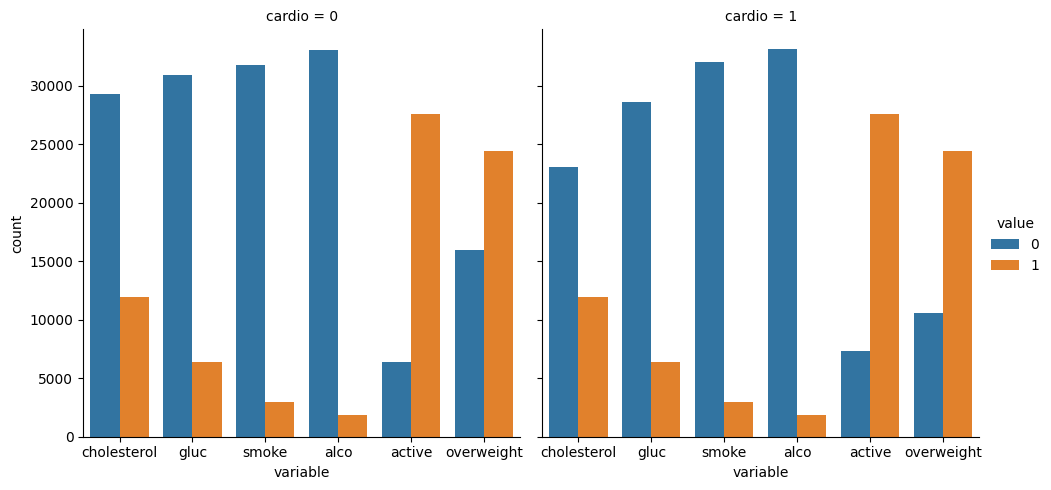

In [7]:
draw_cat_plot()

In [19]:
df_clean = df[df['ap_lo'] <= df['ap_hi']]
# keep data with height less than 2.5th percentile
df_clean = df_clean[df_clean['height'] >= df['height'].quantile(0.025)]
df_clean = df_clean[df_clean['height'] <= df['height'].quantile(0.975)]
df_clean = df_clean[df_clean['weight'] >= df['weight'].quantile(0.025)]
df_clean = df_clean[df_clean['weight'] <= df['weight'].quantile(0.975)]
# cleaned data
df_clean

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [24]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_clean = df[df['ap_lo'] <= df['ap_hi']]
    # keep data with height less than 2.5th percentile
    df_clean = df_clean[df_clean['height'] >= df['height'].quantile(0.025)]
    df_clean = df_clean[df_clean['height'] <= df['height'].quantile(0.975)]
    df_clean = df_clean[df_clean['weight'] >= df['weight'].quantile(0.025)]
    df_clean = df_clean[df_clean['weight'] <= df['weight'].quantile(0.975)]
    df_heat = df_clean

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(matrix)



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(matrix, mask=mask, annot=True, linewidth=0.5)


    # Do not modify the next two lines
    # fig.savefig('heatmap.png')
    # return fig


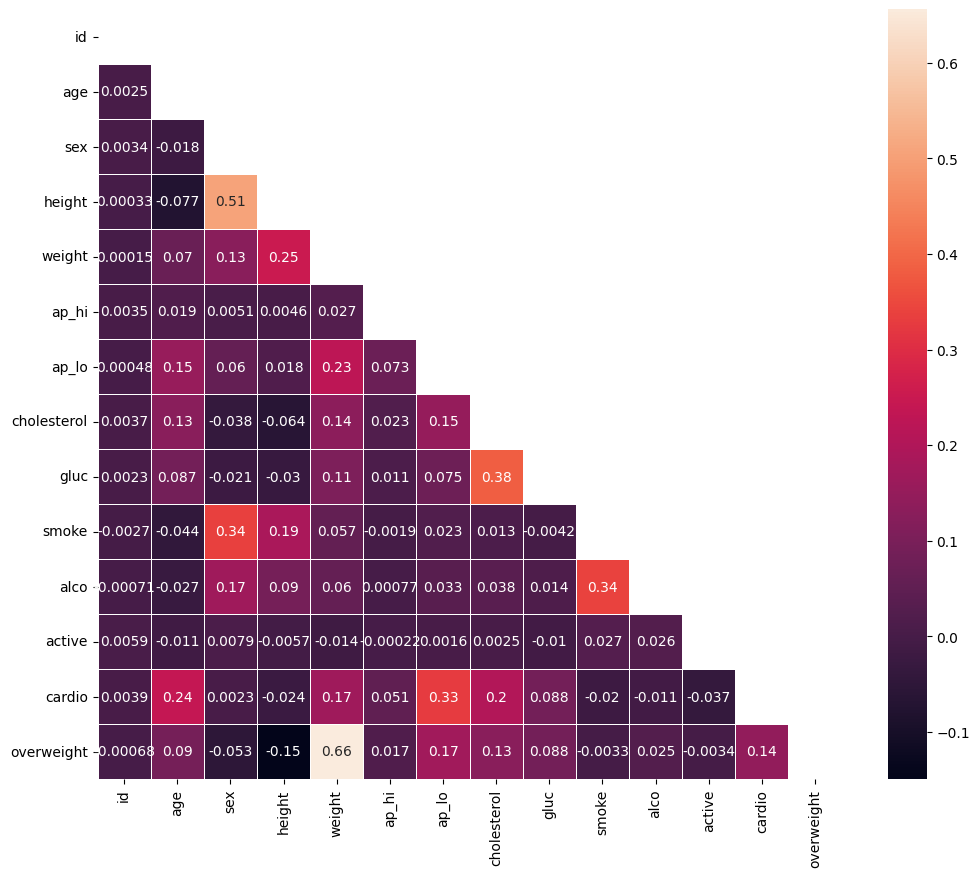

In [25]:
draw_heat_map()